# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

#                      Leiden Notebook 

## Leiden Clustering of CTCs
          
          
          

### Required Packages

In [43]:
library(reticulate)
reticulate::install_miniconda()
reticulate::use_condaenv()
py_install("python-igraph")
py_install("numpy")
py_install("leidenalg", forge = TRUE)
library(DIscBIO)
library(leiden)
library(M3Drop)


ERROR: Error: Miniconda is already installed at '/home/jovyan/.local/share/r-miniconda'


### Required data


In [2]:
load("SC.RData")           # Loading the "SC" object that has include the data of the k-means clustering 
load("Ndata.RData")        # Loading the "Ndata" object and stored in the @ndata will be used to plot the expression of genes 

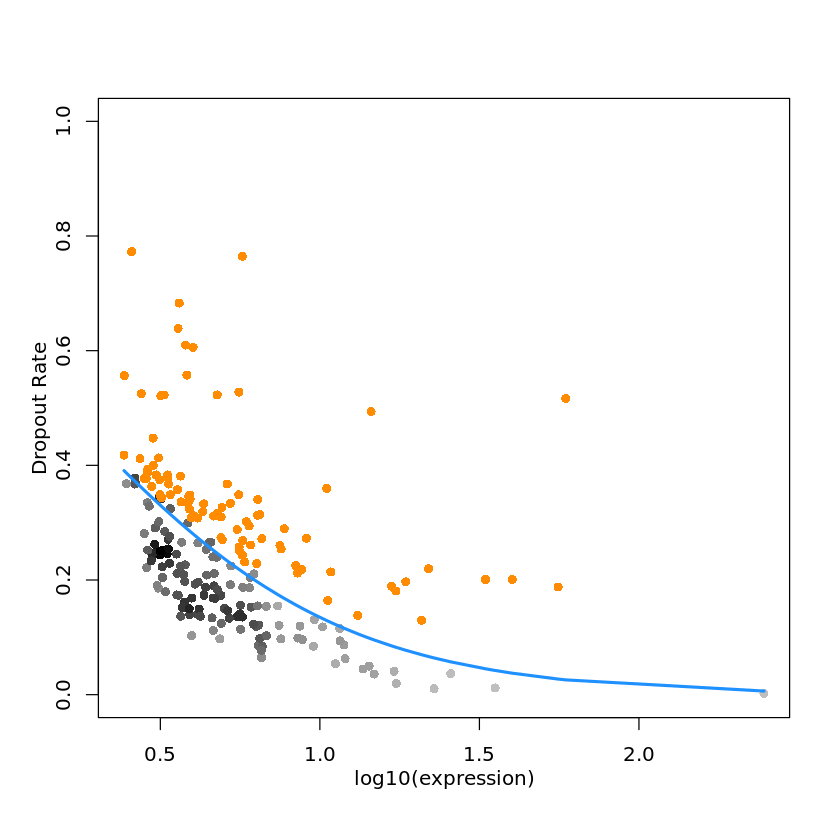

In [10]:
filteredDataset<-Ndata
xprs <- as.matrix(filteredDataset)
xprs[xprs == min(xprs)] <- 0
top.feats <- M3Drop::M3DropFeatureSelection(expr_mat = xprs, mt_method = "fdr",suppress.plot = FALSE, mt_threshold = 0.5) ## Fits a Michaelis-Menten function to the dropout-rate.
top.feats <- head(top.feats$Gene, 500)
top.xprs <- xprs[top.feats, ]
Adj <- stats::cor(top.xprs)
QNT <- quantile(Adj, probs = c(0.5))
bin.Adj <- (Adj > QNT) + 0

### Leiden clustering

The Leiden clustering algorithm has the ability for identifying high-quality partitions and it is partly based on the smart local move algorithm. The Leiden algorithm uses a fast local move procedure. It is considerably more complex than the Louvain algorithm. The resolution parameter controls the coarseness of the clusters and it can fine-tune the number of clusters to be detected.

#### resolution_parameter = 0.5

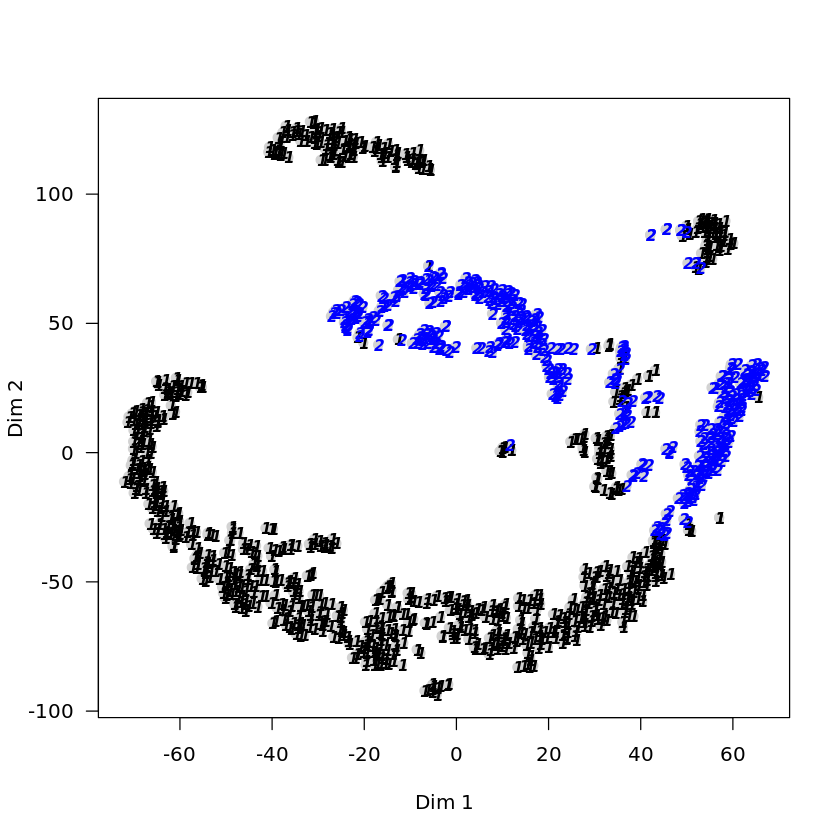

In [16]:
lei.clusts <- leiden(bin.Adj, resolution_parameter = 0.5)   # Leiden algorithm
names(lei.clusts) <- colnames(bin.Adj)

### Visualizing the clusters
SC@kmeans$kpart<-lei.clusts
Factor<-factor(lei.clusts)
K<- length(levels(Factor))
plottSNE(SC)

#### Evaluating the stability and consistancy of the clusters

In [40]:
# Silhouette plot
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(SC,K=K)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'plotSilhouette': object 'SC' not found


[1] 0.566 0.382

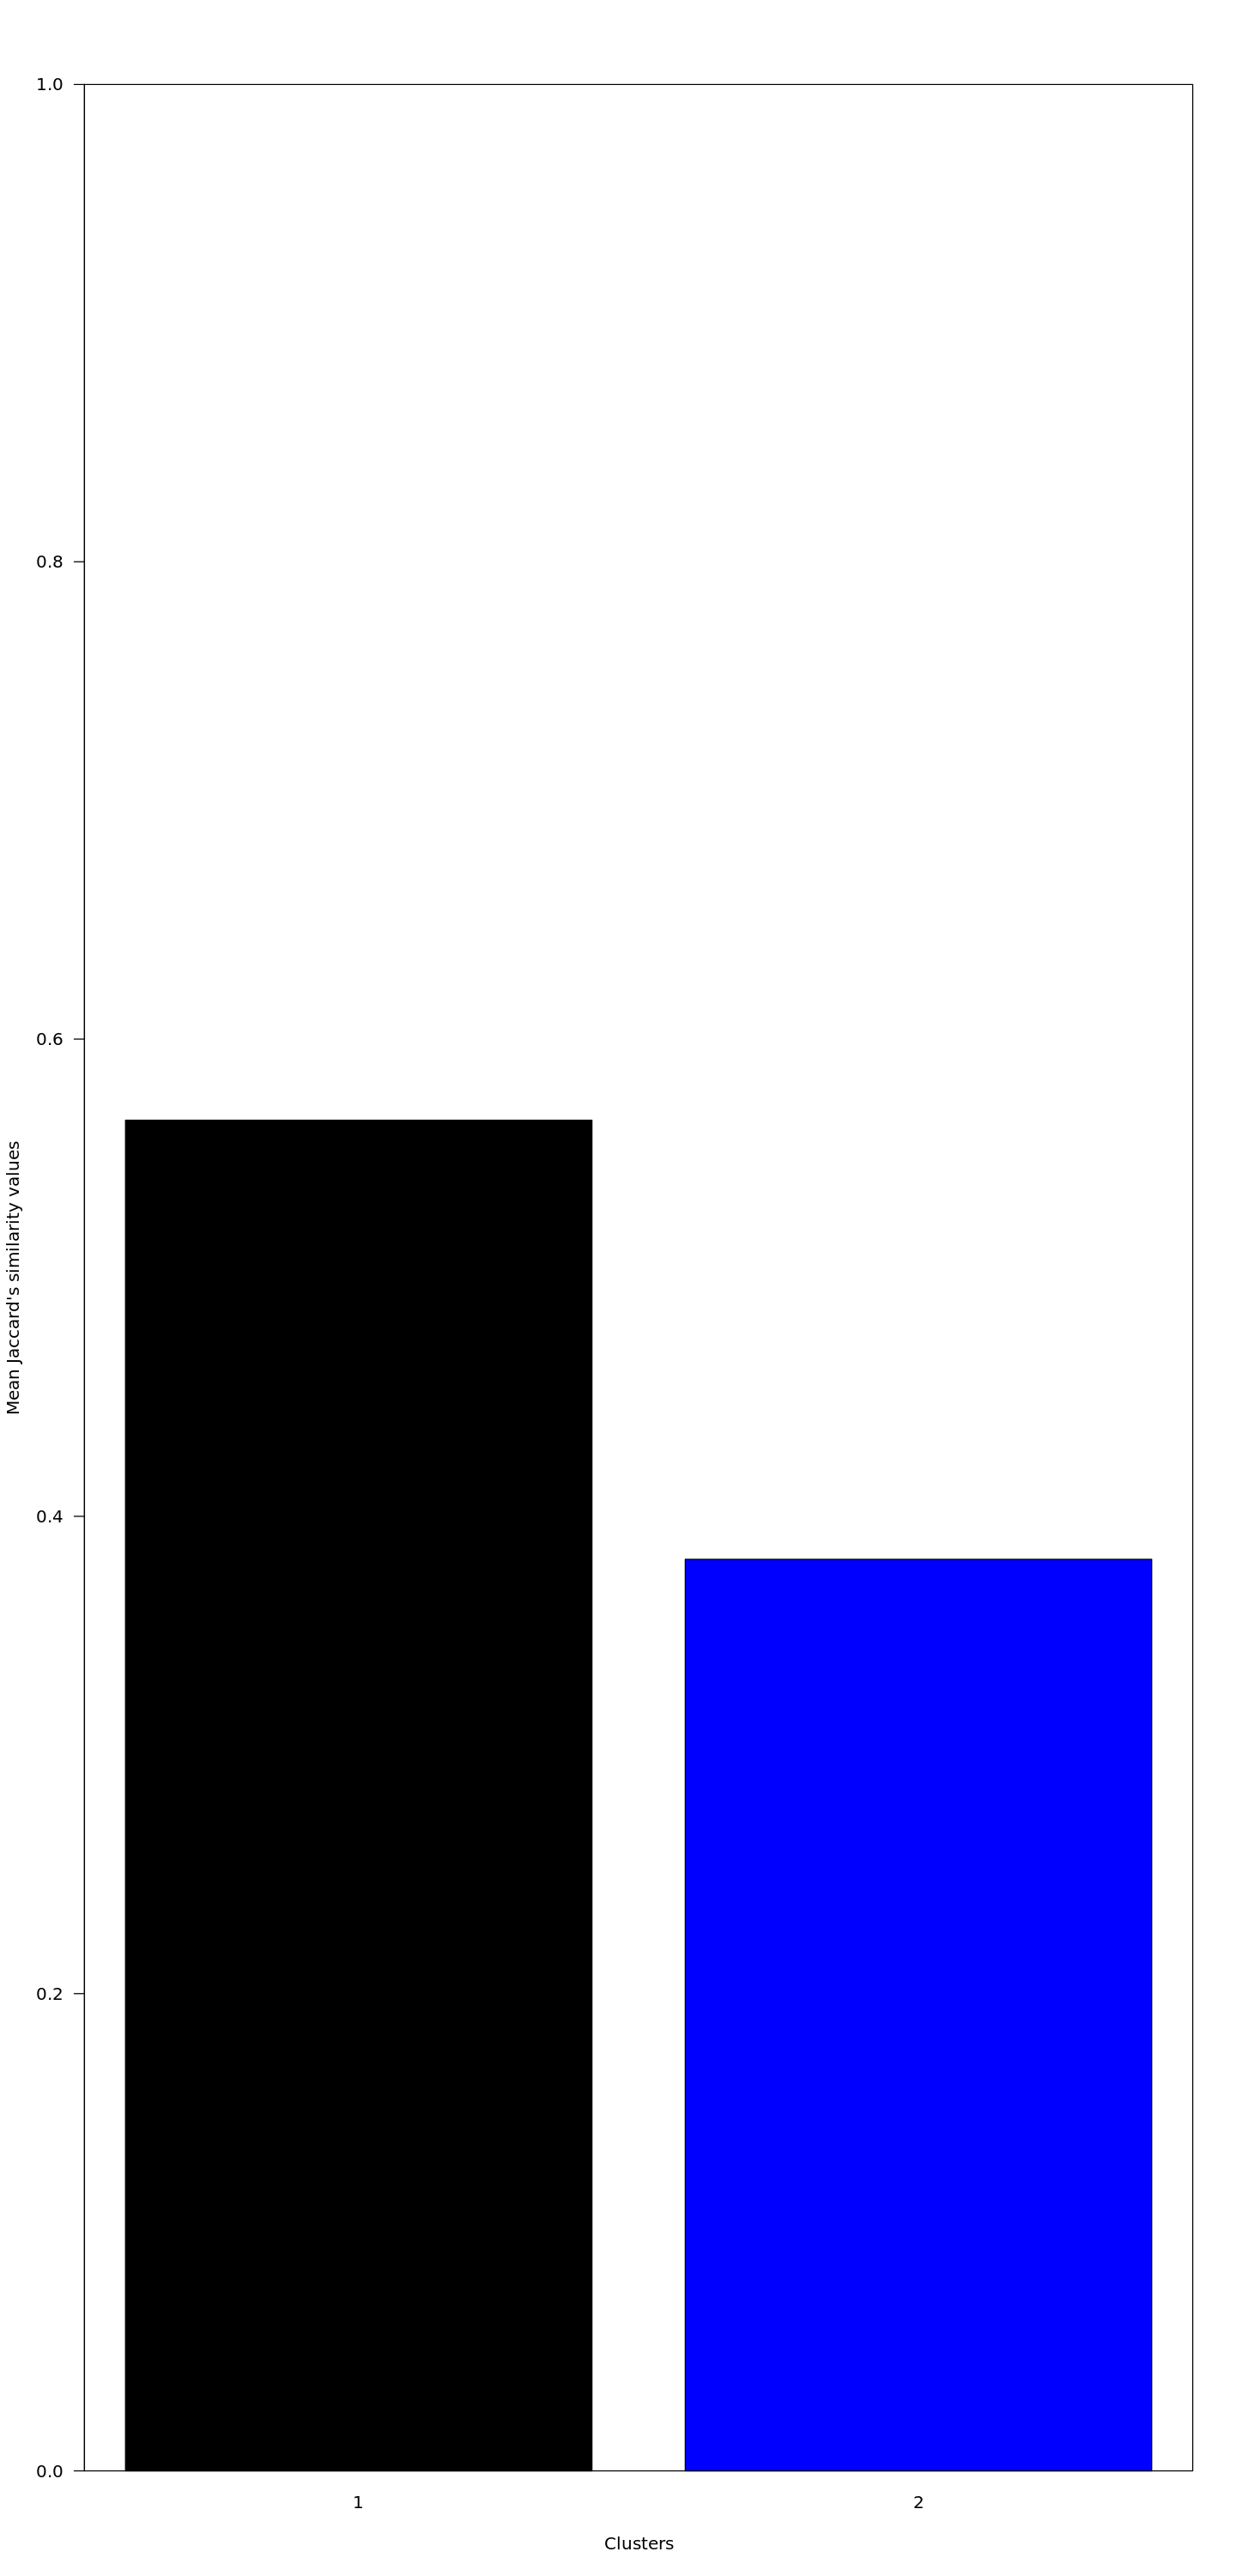

In [21]:
 # Jaccard Similarity
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(SC, K=K, plot = TRUE)   

#### resolution_parameter = 1

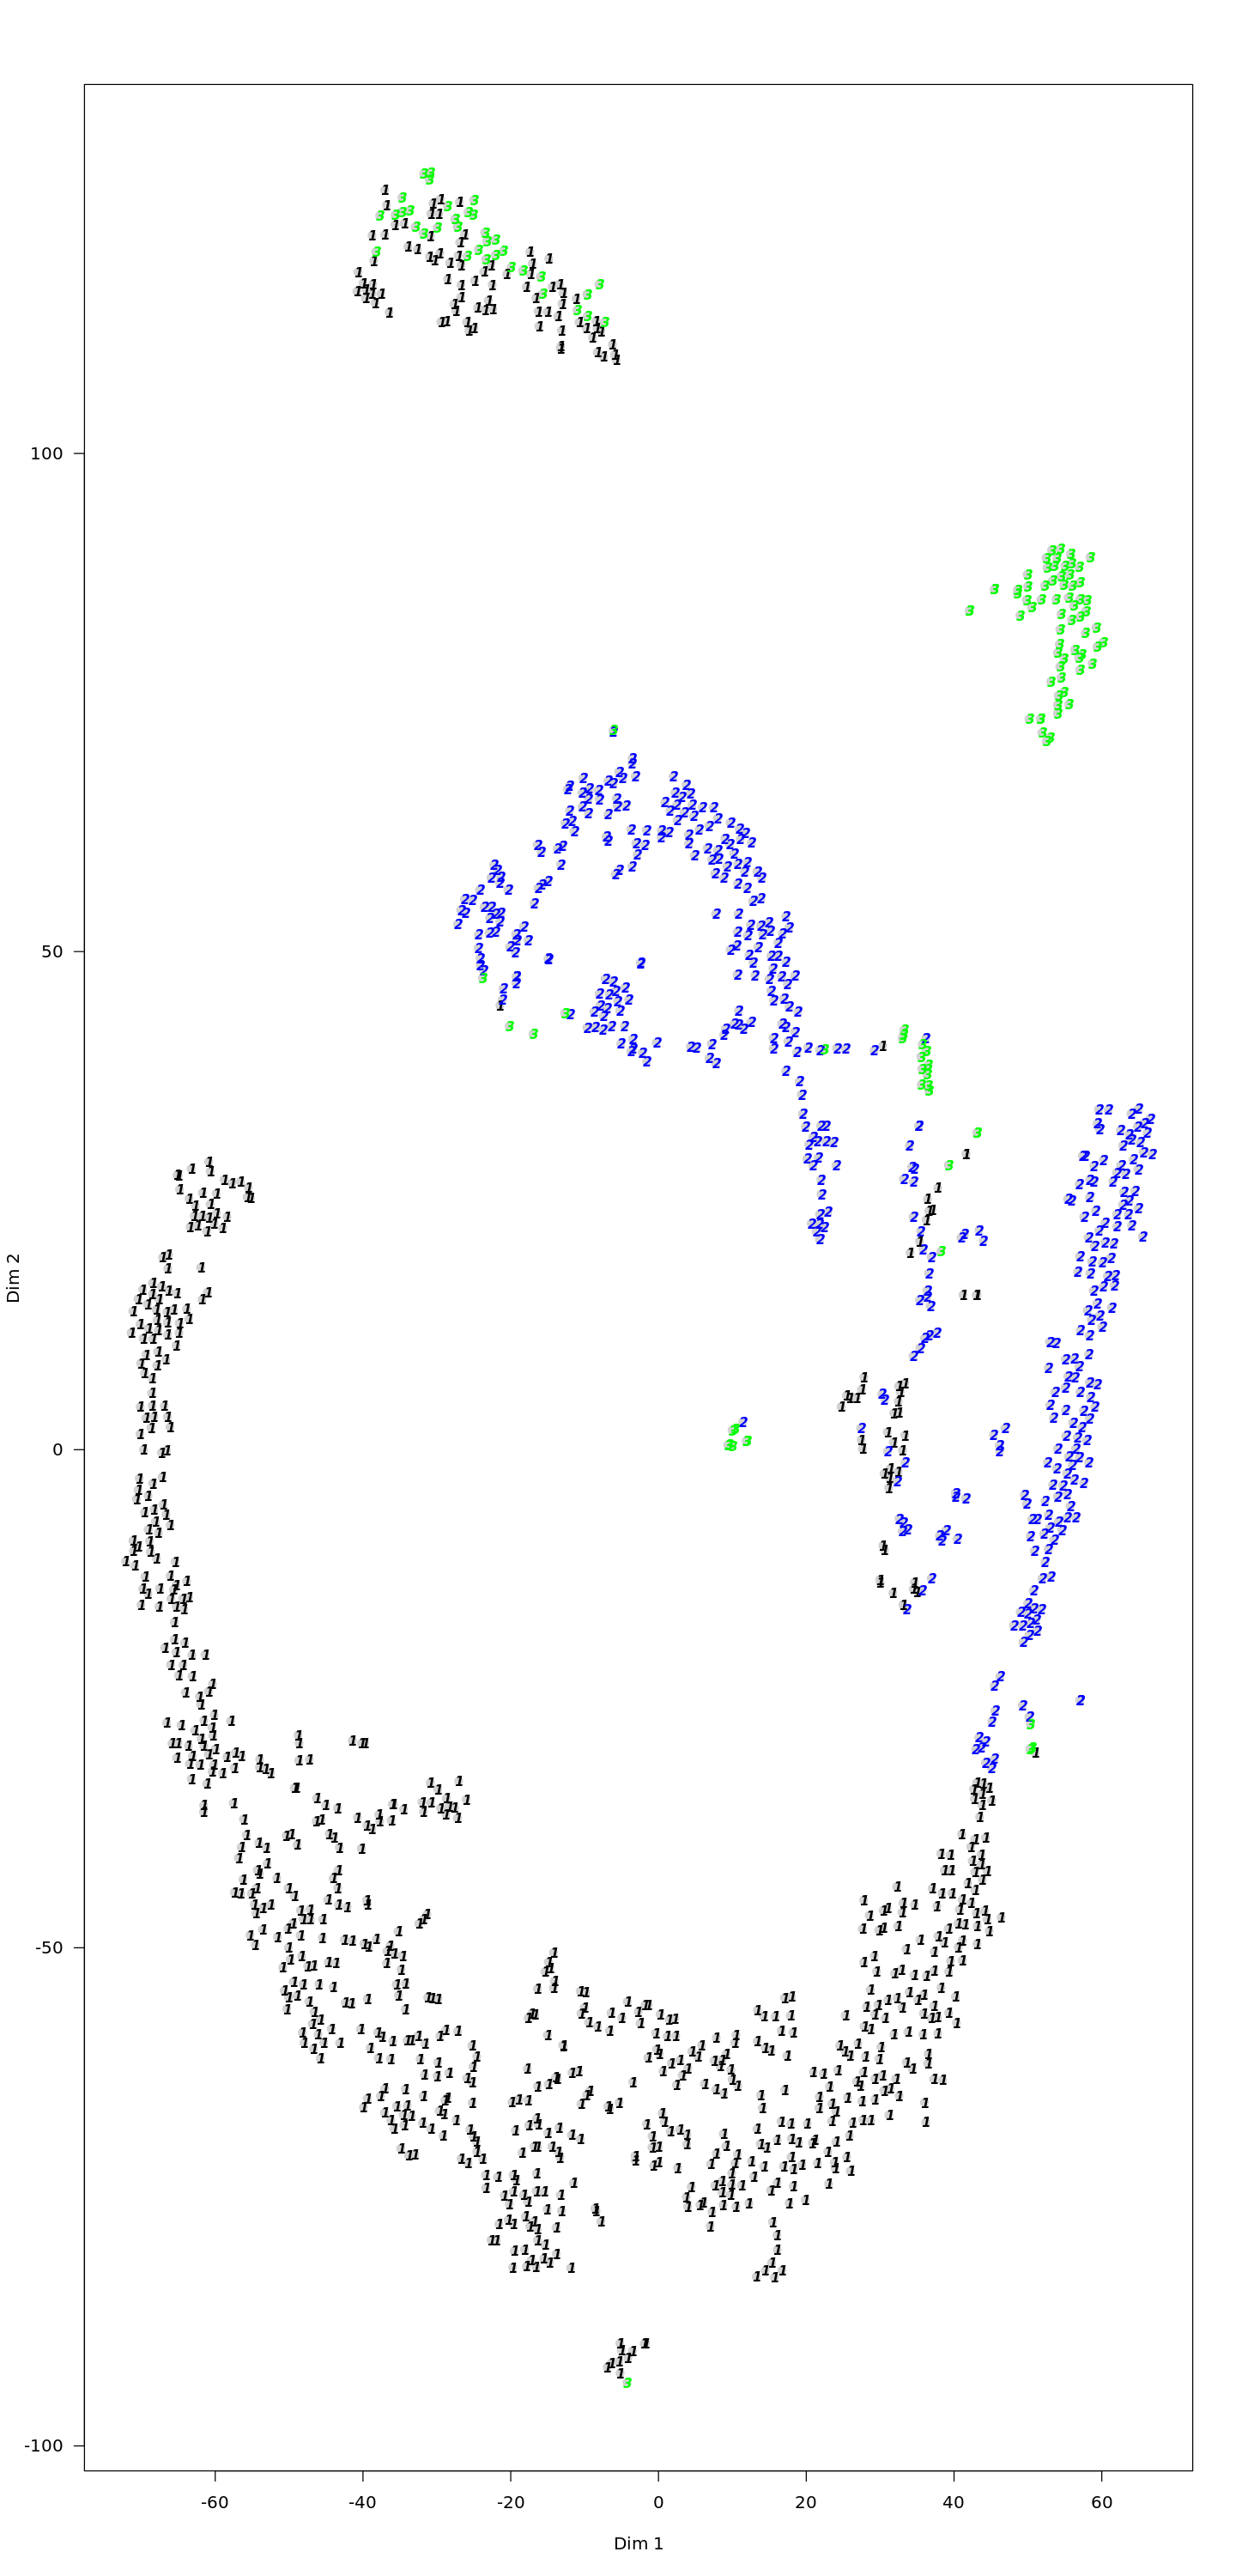

In [38]:
lei.clusts <- leiden(bin.Adj, resolution_parameter = 1)   # Leiden algorithm
names(lei.clusts) <- colnames(bin.Adj)

### Visualizing the clusters
sc@kmeans$kpart<-lei.clusts
Factor<-factor(lei.clusts)
K<- length(levels(Factor))
plottSNE(sc)

#### Evaluating the stability and consistancy of the clusters

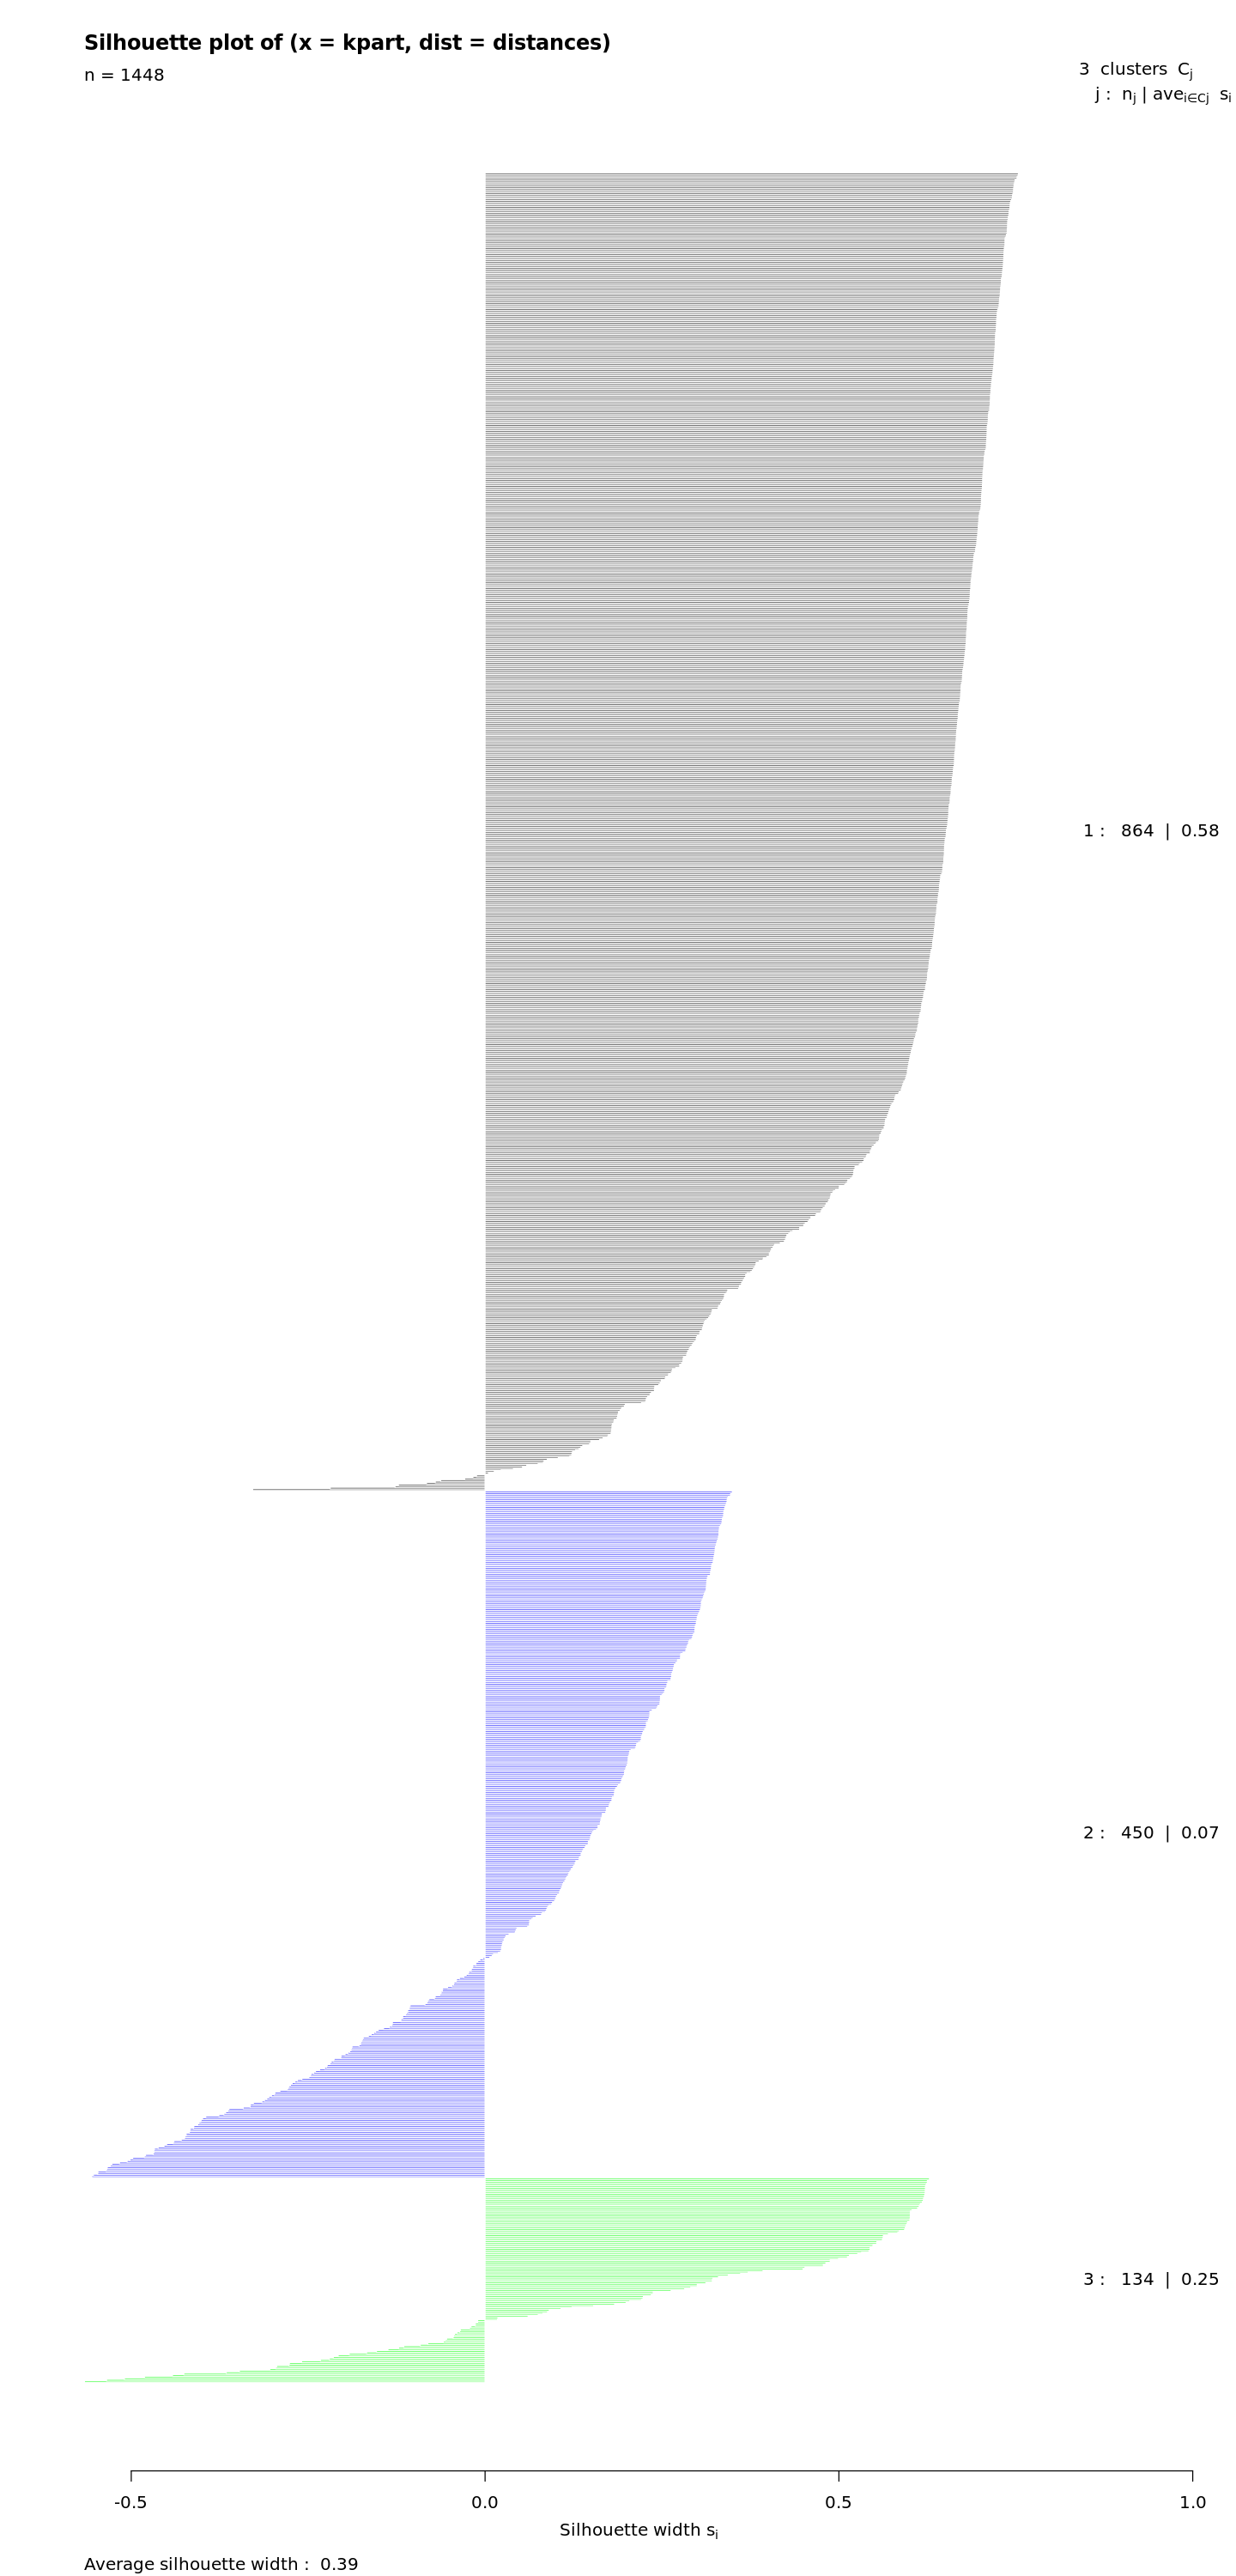

In [42]:
# Silhouette plot
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(sc,K=K)

In [ ]:
 # Jaccard Similarity
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(sc, K=K, plot = TRUE)   